In [21]:
import pandas as pd
import numpy as np

In [22]:
train=pd.read_csv('Train.csv')
test=pd.read_csv('Test.csv')
sampleSub=pd.read_csv('SampleSubmission.csv')

In [23]:
print(f'train cols: {len(train.columns)}')
print(f'test cols: {len(test.columns)}')

train cols: 82
test cols: 77


In [24]:
# identify target
target_cols = []
for i in train.columns.values:
    if i not in test.columns.values:
        target_cols.append(i)

In [25]:
train[target_cols].head()

,target,target_min,target_max,target_variance,target_count
0,38.0,23.0,53.0,769.50,92
1,39.0,25.0,63.0,1319.85,91
2,24.0,8.0,56.0,1181.96,96
3,49.0,10.0,55.0,1113.67,96
4,21.0,9.0,52.0,1164.82,95


In [26]:
target = train['target']

In [27]:
target

0         38.0
1         39.0
2         24.0
3         49.0
4         21.0
         ...  
30552     22.0
30553     53.0
30554     85.0
30555    103.0
30556     89.0
Name: target, Length: 30557, dtype: float64

In [28]:
# get the correlation of each feature with respect to the target (diagnosis)
train_corr = train.corr()['target'].abs().sort_values(ascending=False)
train_corr

/tmp/ipykernel_41088/879224335.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_corr = train.corr()['target'].abs().sort_values(ascending=False)


target                                             1.000000
target_min                                         0.818803
target_max                                         0.630801
L3_CO_CO_column_number_density                     0.375737
L3_HCHO_tropospheric_HCHO_column_number_density    0.347125
                                                     ...   
L3_CLOUD_sensor_azimuth_angle                      0.003763
L3_NO2_sensor_azimuth_angle                        0.003722
L3_O3_sensor_azimuth_angle                         0.001783
L3_NO2_solar_zenith_angle                          0.001192
L3_CO_H2O_column_number_density                    0.000596
Name: target, Length: 79, dtype: float64

In [29]:
# get all the features that has at least 0.6 in correlation to the 
# target

features = train_corr[train_corr > 0.1].index.to_list()[1:]

print(len(features))                          # without the 'diagnosis' column
features

28


['target_min',
 'target_max',
 'L3_CO_CO_column_number_density',
 'L3_HCHO_tropospheric_HCHO_column_number_density',
 'L3_HCHO_HCHO_slant_column_number_density',
 'L3_NO2_NO2_slant_column_number_density',
 'L3_AER_AI_sensor_altitude',
 'L3_NO2_NO2_column_number_density',
 'L3_NO2_tropospheric_NO2_column_number_density',
 'L3_AER_AI_solar_azimuth_angle',
 'L3_CLOUD_solar_azimuth_angle',
 'L3_O3_solar_azimuth_angle',
 'target_variance',
 'L3_HCHO_solar_azimuth_angle',
 'L3_SO2_solar_azimuth_angle',
 'L3_NO2_solar_azimuth_angle',
 'L3_CO_solar_azimuth_angle',
 'L3_SO2_absorbing_aerosol_index',
 'u_component_of_wind_10m_above_ground',
 'L3_NO2_cloud_fraction',
 'L3_CLOUD_cloud_top_pressure',
 'L3_CLOUD_cloud_optical_depth',
 'L3_CH4_solar_azimuth_angle',
 'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
 'L3_CLOUD_cloud_fraction',
 'L3_O3_cloud_fraction',
 'L3_CLOUD_cloud_top_height',
 'L3_CO_cloud_height']

In [30]:

features.pop(features.index('target_min'))
features.pop(features.index('target_max'))
features.pop(features.index('target_variance'))

train = train[features]
test = test[features]

In [31]:
test.columns

Index(['L3_CO_CO_column_number_density',
       'L3_HCHO_tropospheric_HCHO_column_number_density',
       'L3_HCHO_HCHO_slant_column_number_density',
       'L3_NO2_NO2_slant_column_number_density', 'L3_AER_AI_sensor_altitude',
       'L3_NO2_NO2_column_number_density',
       'L3_NO2_tropospheric_NO2_column_number_density',
       'L3_AER_AI_solar_azimuth_angle', 'L3_CLOUD_solar_azimuth_angle',
       'L3_O3_solar_azimuth_angle', 'L3_HCHO_solar_azimuth_angle',
       'L3_SO2_solar_azimuth_angle', 'L3_NO2_solar_azimuth_angle',
       'L3_CO_solar_azimuth_angle', 'L3_SO2_absorbing_aerosol_index',
       'u_component_of_wind_10m_above_ground', 'L3_NO2_cloud_fraction',
       'L3_CLOUD_cloud_top_pressure', 'L3_CLOUD_cloud_optical_depth',
       'L3_CH4_solar_azimuth_angle',
       'L3_HCHO_tropospheric_HCHO_column_number_density_amf',
       'L3_CLOUD_cloud_fraction', 'L3_O3_cloud_fraction',
       'L3_CLOUD_cloud_top_height', 'L3_CO_cloud_height'],
      dtype='object')

In [32]:
# cols = list(train.columns.values)
# cols.pop(cols.index('target'))
# cols.pop(cols.index('target_min'))
# cols.pop(cols.index('target_max'))
# cols.pop(cols.index('target_variance'))
# # cols.pop(cols.index('target_count'))
# train = train[cols]

In [33]:
# train.drop(['Place_ID X Date','Date','Place_ID'],inplace=True,axis=1)
# test.drop(['Place_ID X Date','Date','Place_ID'],inplace=True,axis=1)

In [34]:
train.head(1)

,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_AER_AI_solar_azimuth_angle,L3_CLOUD_solar_azimuth_angle,L3_O3_solar_azimuth_angle,...,u_component_of_wind_10m_above_ground,L3_NO2_cloud_fraction,L3_CLOUD_cloud_top_pressure,L3_CLOUD_cloud_optical_depth,L3_CH4_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_fraction,L3_O3_cloud_fraction,L3_CLOUD_cloud_top_height,L3_CO_cloud_height
0,0.02108,0.000064,-0.00001,0.000156,840209.874619,0.000074,0.000017,-61.736719,-61.752587,-61.752587,...,1.996377,0.006507,NaN,NaN,-62.142639,0.566828,0.0,0.0,NaN,267.017184


In [35]:
test.head(1)

,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_AER_AI_solar_azimuth_angle,L3_CLOUD_solar_azimuth_angle,L3_O3_solar_azimuth_angle,...,u_component_of_wind_10m_above_ground,L3_NO2_cloud_fraction,L3_CLOUD_cloud_top_pressure,L3_CLOUD_cloud_optical_depth,L3_CH4_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_fraction,L3_O3_cloud_fraction,L3_CLOUD_cloud_top_height,L3_CO_cloud_height
0,0.017953,0.000088,0.000073,0.000108,835670.49274,0.000053,0.000007,-95.984984,-95.984984,-95.984984,...,3.956377,0.010752,74023.930722,6.317523,NaN,1.494039,0.032268,0.032071,2593.137433,155.982981


In [36]:
for i in train.columns.values:
    train[i].fillna((train[i].mean()), inplace=True)
    
for i in test.columns.values:
    test[i].fillna((test[i].mean()), inplace=True)

In [37]:
from sklearn.preprocessing import StandardScaler

# performing standardization
sc = StandardScaler()
train_scaled = sc.fit_transform(train)

# apply PCA to the features using the PCA class in the sklearn.decomposition module

from sklearn.decomposition import PCA
components = None
pca = PCA(n_components = components)

# perform PCA on the scaled data
pca.fit(train_scaled)

PCA()

In [38]:
# print the explained variances

'''
So how do you interpret the output? You can interpret it as follows:

The first component alone captures about 44% variability in the data
The second one captures about 19% variability in the data and so on.
The 30 components altogether capture 100% variability in the data.

'''

print("Variances (Percentage):")
print(pca.explained_variance_ratio_ * 100)
print()

# A much easier way to understand the above result is to print the cumulative variances
'''
You can now interpret the cumulative variances as follows:

The first component alone captures about 44% variability in the data
The first two components capture about 63% variability in the data and so on.
The first 8 components together capture about 92.6% variability in the data.
'''

print("Cumulative Variances (Percentage):")
print(pca.explained_variance_ratio_.cumsum() * 100)
print()

Variances (Percentage):
[24.43657475 15.49552472 10.37297626  8.96613798  7.49533102  4.54939191
  3.93385264  3.60866017  3.39712528  2.71444995  2.57546285  2.49458358
  2.19432137  1.82030363  1.42943633  1.22914191  0.88836257  0.80190229
  0.50775894  0.36740191  0.33720668  0.20853496  0.08733408  0.05133013
  0.0368941 ]

Cumulative Variances (Percentage):
[ 24.43657475  39.93209947  50.30507573  59.27121371  66.76654473
  71.31593664  75.24978928  78.85844945  82.25557473  84.97002468
  87.54548752  90.04007111  92.23439247  94.0546961   95.48413244
  96.71327434  97.60163691  98.4035392   98.91129814  99.27870005
  99.61590673  99.82444169  99.91177576  99.9631059  100.        ]



Cumulative Variances (Percentage):
[24.43657475 39.93209947 50.30507573 59.27121371 66.76654473 71.31593664
 75.24978928 78.85844945 82.25557473 84.97002468 87.54548752]
Number of components: 11


Text(0, 0.5, 'Explained variance (%)')

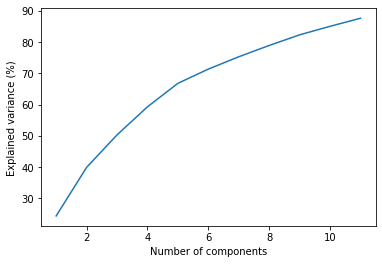

In [39]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components = 0.85)
pca.fit(train_scaled)
print("Cumulative Variances (Percentage):")
print(np.cumsum(pca.explained_variance_ratio_ * 100))

components = len(pca.explained_variance_ratio_)
print(f'Number of components: {components}')

# Make the scree plot
plt.plot(range(1, components + 1), np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of components")
plt.ylabel("Explained variance (%)")

In [40]:
# You can also find out the importance of each feature that contributes 
# to each of the components using the components_ attribute of the pca object
# The importance of each feature is reflected by the magnitude of the corresponding
# values in the output — the higher magnitude, the higher the importance

pca_components = abs(pca.components_)
print(pca_components)

[[0.13660912 0.07860027 0.06955492 0.08850751 0.23808511 0.09918541
  0.10337676 0.36528659 0.36766942 0.37427879 0.33767191 0.33637512
  0.33924744 0.326782   0.09653748 0.06384042 0.03102356 0.01678739
  0.00122034 0.08831872 0.02137583 0.05124604 0.04040577 0.01627665
  0.01059368]
 [0.07635276 0.15559081 0.15444211 0.15733658 0.01784616 0.0885884
  0.10775417 0.04512364 0.04675664 0.05459428 0.06027814 0.05971074
  0.05704663 0.05142649 0.12776593 0.01874568 0.38586404 0.22979381
  0.33628687 0.09835285 0.08976669 0.44431225 0.443423   0.20806155
  0.30782727]
 [0.17161289 0.16152213 0.15980684 0.49925985 0.01602919 0.51870525
  0.51168024 0.10462959 0.10733162 0.07559584 0.0590531  0.05866832
  0.02493675 0.06720304 0.05563737 0.00967075 0.14427912 0.06845693
  0.08568217 0.06615081 0.05356313 0.13874793 0.15395121 0.06759335
  0.08650848]
 [0.1127655  0.29281581 0.20188457 0.13423625 0.00975446 0.0327549
  0.03050045 0.02312181 0.02188102 0.00166237 0.0023942  0.00101669
  0.0154

In [41]:
# For curiosity, let’s print out the top 4 features that contributes the most to each of the 6 components
print('Top most important features in each component')
print('===============================================')
for row in range(pca_components.shape[0]):
    # get the indices of the top 4 values in each row
    temp = np.argpartition(-(pca_components[row]), 4)
    
    # sort the indices in descending order
    indices = temp[np.argsort((-pca_components[row])[temp])][:4]
    
    # print the top 4 feature names
    print(f'Component {row}: {train.columns[indices].to_list()}')

Top 4 most important features in each component
Component 0: ['L3_O3_solar_azimuth_angle', 'L3_CLOUD_solar_azimuth_angle', 'L3_AER_AI_solar_azimuth_angle', 'L3_NO2_solar_azimuth_angle']
Component 1: ['L3_CLOUD_cloud_fraction', 'L3_O3_cloud_fraction', 'L3_NO2_cloud_fraction', 'L3_CLOUD_cloud_optical_depth']
Component 2: ['L3_NO2_NO2_column_number_density', 'L3_NO2_tropospheric_NO2_column_number_density', 'L3_NO2_NO2_slant_column_number_density', 'L3_CO_CO_column_number_density']
Component 3: ['L3_CLOUD_cloud_top_height', 'L3_CLOUD_cloud_top_pressure', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', 'L3_HCHO_tropospheric_HCHO_column_number_density']
Component 4: ['L3_HCHO_HCHO_slant_column_number_density', 'L3_HCHO_tropospheric_HCHO_column_number_density', 'L3_CO_CO_column_number_density', 'L3_NO2_NO2_slant_column_number_density']
Component 5: ['L3_SO2_absorbing_aerosol_index', 'L3_CH4_solar_azimuth_angle', 'L3_HCHO_tropospheric_HCHO_column_number_density_amf', 'L3_CO_CO_column_nu

In [42]:
X_pca = pca.transform(train_scaled)
print(X_pca.shape)
print(X_pca)

(30557, 11)
[[ 3.07108875e+00  1.75523699e+00 -9.32718719e-01 ... -1.17577364e+00
   2.87888557e-01 -3.87015600e-02]
 [ 2.63928747e+00  2.95228862e+00 -4.09458213e-01 ... -2.01679168e+00
   1.03420915e+00 -2.51283883e-01]
 [ 2.54138395e+00  2.36211293e+00 -1.09649984e+00 ... -1.58884595e+00
   9.38987211e-01 -2.79897124e-01]
 ...
 [-1.58767157e+00  1.38262255e-01 -8.92480657e-01 ... -1.21918972e-01
   3.85402489e-01  1.03811851e+00]
 [-1.86456933e+00  7.04923289e-01 -1.29620115e+00 ... -8.49672996e-01
  -8.17182525e-02  1.94340562e-01]
 [-5.67077460e-02  3.57054655e-01 -9.02681258e-02 ...  2.12086203e-04
   3.33550478e-02  1.76095866e-01]]


In [44]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import catboost as cb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance



_sc = StandardScaler()
_pca = PCA(n_components = components)
_model = cb.CatBoostRegressor(loss_function='RMSE')
cb_regress_model = Pipeline([
    ('std_scaler', _sc),
    ('pca', _pca),
    ('regressor', _model)
])

# perform a split
X_train, X_test, y_train, y_test = train_test_split(train, target,
                     test_size=0.3,
                     shuffle=True, 
                     random_state=random_state)

# train the model using the PCA components
cb_regress_model.fit(X_train,y_train)

NameError: name 'CatBoostRegressor' is not defined

In [ ]:
pred = cb_regress_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 36.69
R2: 0.40


In [ ]:

#---perform a split---
random_state = 12
# X_train, X_test, y_train, y_test = train_test_split(train, target,
#                      test_size = 0.3,
#                      shuffle = True,
#                      random_state=random_state)

train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

model = cb.CatBoostRegressor(loss_function='RMSE')

grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}
model.grid_search(grid, train_dataset)

In [ ]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

# Testing performance
# RMSE: 30.97
# R2: 0.58
# 28.480728808

Testing performance
RMSE: 33.63
R2: 0.50


In [ ]:
sorted_feature_importance = model.feature_importances_.argsort()

feature_names = list()
for i in sorted_feature_importance:
    feature_names.append(train.columns[i])
#     print(i)
print(f'features sorted by importance: {feature_names}')

AttributeError: 'Pipeline' object has no attribute 'feature_importances_'

In [ ]:
len(feature_names)

25

Text(0.5, 0, 'CatBoost Feature Importance')

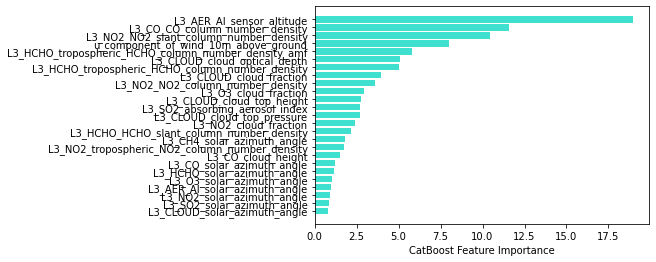

In [ ]:
from matplotlib import pyplot as plt

plt.barh(feature_names, 
        model.feature_importances_[sorted_feature_importance], 
        color='turquoise')
plt.xlabel("CatBoost Feature Importance")

In [ ]:
import shap


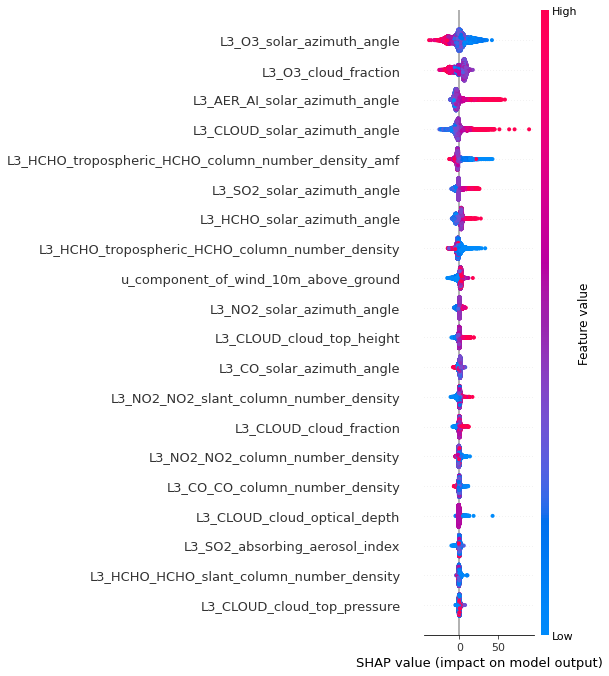

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test, feature_names = feature_names)

In [ ]:
train

,L3_CO_CO_column_number_density,L3_HCHO_tropospheric_HCHO_column_number_density,L3_HCHO_HCHO_slant_column_number_density,L3_NO2_NO2_slant_column_number_density,L3_AER_AI_sensor_altitude,L3_NO2_NO2_column_number_density,L3_NO2_tropospheric_NO2_column_number_density,L3_AER_AI_solar_azimuth_angle,L3_CLOUD_solar_azimuth_angle,L3_O3_solar_azimuth_angle,...,u_component_of_wind_10m_above_ground,L3_NO2_cloud_fraction,L3_CLOUD_cloud_top_pressure,L3_CLOUD_cloud_optical_depth,L3_CH4_solar_azimuth_angle,L3_HCHO_tropospheric_HCHO_column_number_density_amf,L3_CLOUD_cloud_fraction,L3_O3_cloud_fraction,L3_CLOUD_cloud_top_height,L3_CO_cloud_height
0,0.021080,0.000064,-0.000010,0.000156,840209.874619,0.000074,0.000017,-61.736719,-61.752587,-61.752587,...,1.996377,0.006507,70799.498221,18.201564,-62.142639,0.566828,0.000000,0.000000,3286.134009,267.017184
1,0.022017,0.000171,0.000114,0.000197,840772.941995,0.000076,0.000021,-67.693509,-67.693509,-67.693509,...,3.330430,0.018360,99353.672374,5.958538,-53.868134,0.858446,0.059358,0.059433,175.072145,61.216687
2,0.020677,0.000124,0.000027,0.000170,841410.713456,0.000067,0.000007,-78.342701,-78.342701,-78.342701,...,5.065727,0.015904,95671.383578,5.755760,-69.098594,0.910536,0.082247,0.082063,508.977723,134.700335
3,0.021207,0.000081,0.000023,0.000175,841103.242368,0.000083,0.000023,-73.896572,-73.896588,-73.896588,...,3.004001,0.055765,96232.486418,6.246885,-69.098594,1.132571,0.121555,0.121261,495.380407,474.821444
4,0.037766,0.000140,0.000037,0.000142,840763.055499,0.000070,0.000009,-68.612480,-68.612480,-68.612480,...,2.621787,0.028530,52561.523079,4.205691,-69.098594,0.649359,0.037008,0.037919,5314.483207,926.926310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30552,0.039941,0.000024,-0.000003,0.000165,833637.575687,0.000063,0.000019,12.312248,12.312248,12.312248,...,-4.810586,0.001107,98145.783526,5.875377,-69.098594,0.857937,0.001238,0.001310,275.606335,192.388239
30553,0.037872,-0.000014,-0.000034,0.000161,833894.342749,0.000072,0.000033,1.301716,-129.236726,-129.236726,...,-2.346421,0.004726,95208.391485,5.068010,-157.067467,0.963129,0.007750,0.007644,604.731099,61.379434
30554,0.038539,0.000094,0.000068,0.000135,833286.230217,0.000068,0.000025,-162.856069,-162.856069,-162.856069,...,0.095703,0.026249,32475.936039,10.443789,-69.098594,0.939789,0.026480,0.025447,8774.236499,1572.596434
30555,0.038757,0.000063,-0.000017,0.000148,833480.959689,0.000086,0.000038,-168.907480,-168.907270,-168.907270,...,0.434940,0.144318,86318.900881,9.744343,-69.098594,1.273336,0.175418,0.173391,1483.275669,846.961465


In [ ]:
pred = cb_regress_model.predict(test)


In [ ]:
# x=(pred_test_cat2*0.4+pred_test_cat*0.6)

In [ ]:
results_df = pd.DataFrame({"Place_ID X Date":sampleSub['Place_ID X Date'], "target": np.clip(pred, 0, a_max=None)})

results_df.to_csv("submission.csv", index=False)

In [ ]:
results_df.head()

,Place_ID X Date,target
0,0OS9LVX X 2020-01-02,41.235331
1,0OS9LVX X 2020-01-03,33.839639
2,0OS9LVX X 2020-01-04,30.052951
3,0OS9LVX X 2020-01-05,23.895964
4,0OS9LVX X 2020-01-06,50.660608
